In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

reg_df = pd.read_csv('reg_scores.csv').drop(columns=['Unnamed: 0'])
mlp_df = pd.read_csv('mlp_scores.csv').drop(columns=['Unnamed: 0'])

print("REG")
print(reg_df["Accuracy"].describe())
print("MLP")
print(mlp_df["Accuracy"].describe())

REG
count    18.000000
mean      0.994060
std       0.012750
min       0.948333
25%       0.994167
50%       0.998333
75%       1.000000
max       1.000000
Name: Accuracy, dtype: float64
MLP
count    18.000000
mean      0.935076
std       0.113925
min       0.616667
25%       0.964167
50%       0.985833
75%       0.993333
max       1.000000
Name: Accuracy, dtype: float64


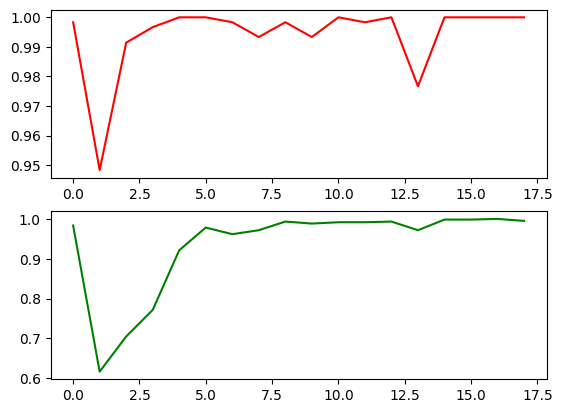

<Figure size 2000x1000 with 0 Axes>

In [8]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(reg_df["Accuracy"], 'r')
ax2.plot(mlp_df["Accuracy"], 'g')
plt.figure(figsize=(20, 10))
plt.show()

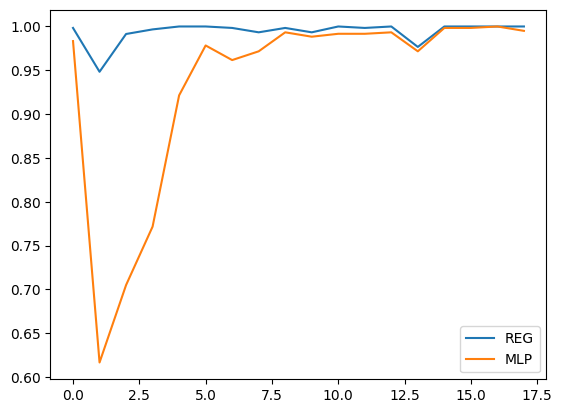

In [11]:
plt.clf()
x = reg_df["Accuracy"]
y = mlp_df["Accuracy"]
plt.plot(x, label="REG")
plt.plot(y, label="MLP")
plt.legend()
plt.show()